In [1]:
import gym
import numpy as np

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import PPO1
# from particle_env import PrticleEnv
from particle_env_continuous_closer import PrticleEnv

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s" % (info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())


/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data3/maze/project/stabl

In [5]:
# env = DummyVecEnv([lambda: PrticleEnv(alpha,win_thre)])
env = PrticleEnv(alpha=1,beta=10,win_thre=1, max_timestep=256)

model = PPO1.load("model/part_circle_exp2_epoch05_sib.zip")


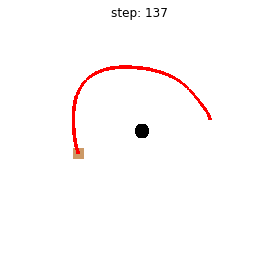

In [ ]:
# Enjoy trained agent
dones = True
# for _ in range(1000):
while True:
    if dones:
        obs = env.reset()
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    obs = np.round(obs,2)
#     show_state(env,info="step:%4d reward:%.2fx%.2f=%.2f" %(env.curr_timestep,env.shift_reward,env.velocity_reward,rewards))
#     show_state(env,info="step:%4d reward:%.2f" %(env.curr_timestep,rewards))
    show_state(env,info="step:%4d " %(env.curr_timestep))

env.close()